In [1]:
import FinanceDataReader as fdr #주식데이터 불러오기
import OpenDartReader # 주식데이터 openapi 사용툴
import pandas as pd # 데이터저장
import matplotlib as mpl # 시각화
import matplotlib.pyplot as plt # 시각화
import matplotlib.font_manager as fm # 한글폰트 적용
import seaborn as sns # 시각화
font_path = r'C:\Windows\Fonts\NanumBarunGothic.ttf' # 한글폰트 경로

In [2]:
import warnings
warnings.filterwarnings('ignore')
#오류 제거

In [9]:
df = fdr.DataReader(symbol='005930',start='2019',)  
# symbol : 종목코드 , 무조건 6자리 사용
# 시작점 미설정시 : 상장일부터
# 종료점 미설정시 : 현재일까지
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
...,...,...,...,...,...,...
2021-11-03,71700,71700,70100,70400,12770428,-0.015385
2021-11-04,71200,71600,70500,70600,11818987,0.002841
2021-11-05,71600,71600,70200,70200,12667743,-0.005666


In [11]:
df['ma20'] = df['Close'].rolling(window=30).mean() # 20일 이동평균
df['stddev'] = df['Close'].rolling(window=30).std() # 20일 이동표준편차
df['upper'] = df['ma20'] + 2*df['stddev'] # 상단밴드
df['lower'] = df['ma20'] - 2*df['stddev'] # 하단밴드
df = df[19:] # 20일 이동평균을 구했기 때문에 20번째 행부터 값이 들어가 있음
df



,Open,High,Low,Close,Volume,Change,ma20,stddev,upper,lower
Date,,,,,,,,,,
2019-01-29,45050,45500,44350,45500,16215017,0.009989,NaN,NaN,NaN,NaN
2019-01-30,44800,46400,44800,46400,17505980,0.019780,NaN,NaN,NaN,NaN
2019-01-31,46650,47050,46150,46150,21621145,-0.005388,NaN,NaN,NaN,NaN
2019-02-01,46650,46950,46250,46350,13832454,0.004334,NaN,NaN,NaN,NaN
2019-02-07,46800,47100,46200,46200,15872001,-0.003236,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-11-03,71700,71700,70100,70400,12770428,-0.015385,72090.000000,2803.612202,77697.224404,66482.775596
2021-11-04,71200,71600,70500,70600,11818987,0.002841,71906.666667,2710.634654,77327.935976,66485.397358
2021-11-05,71600,71600,70200,70200,12667743,-0.005666,71673.333333,2534.851330,76743.035993,66603.630674


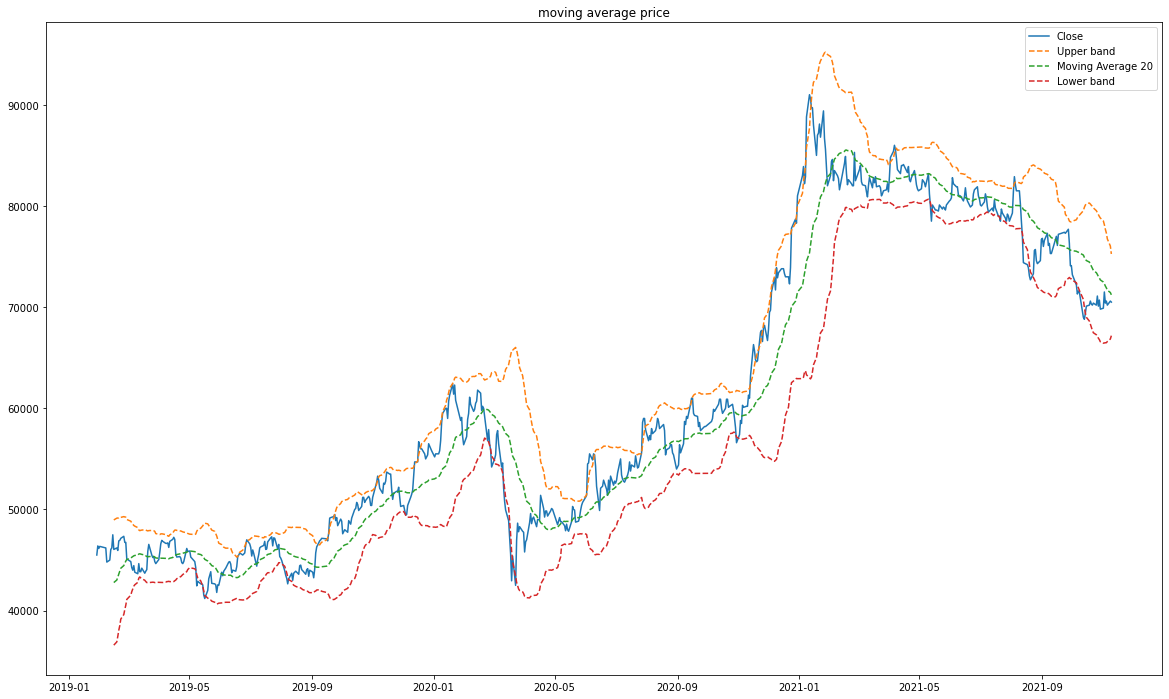

In [16]:
plt.figure(figsize=(20, 12))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['upper'], linestyle='dashed', label='Upper band')
plt.plot(df.index, df['ma20'], linestyle='dashed', label='Moving Average 20')
plt.plot(df.index, df['lower'], linestyle='dashed', label='Lower band')
plt.title('moving average price')
plt.legend(loc='best');

